## Koreliaciju matrica

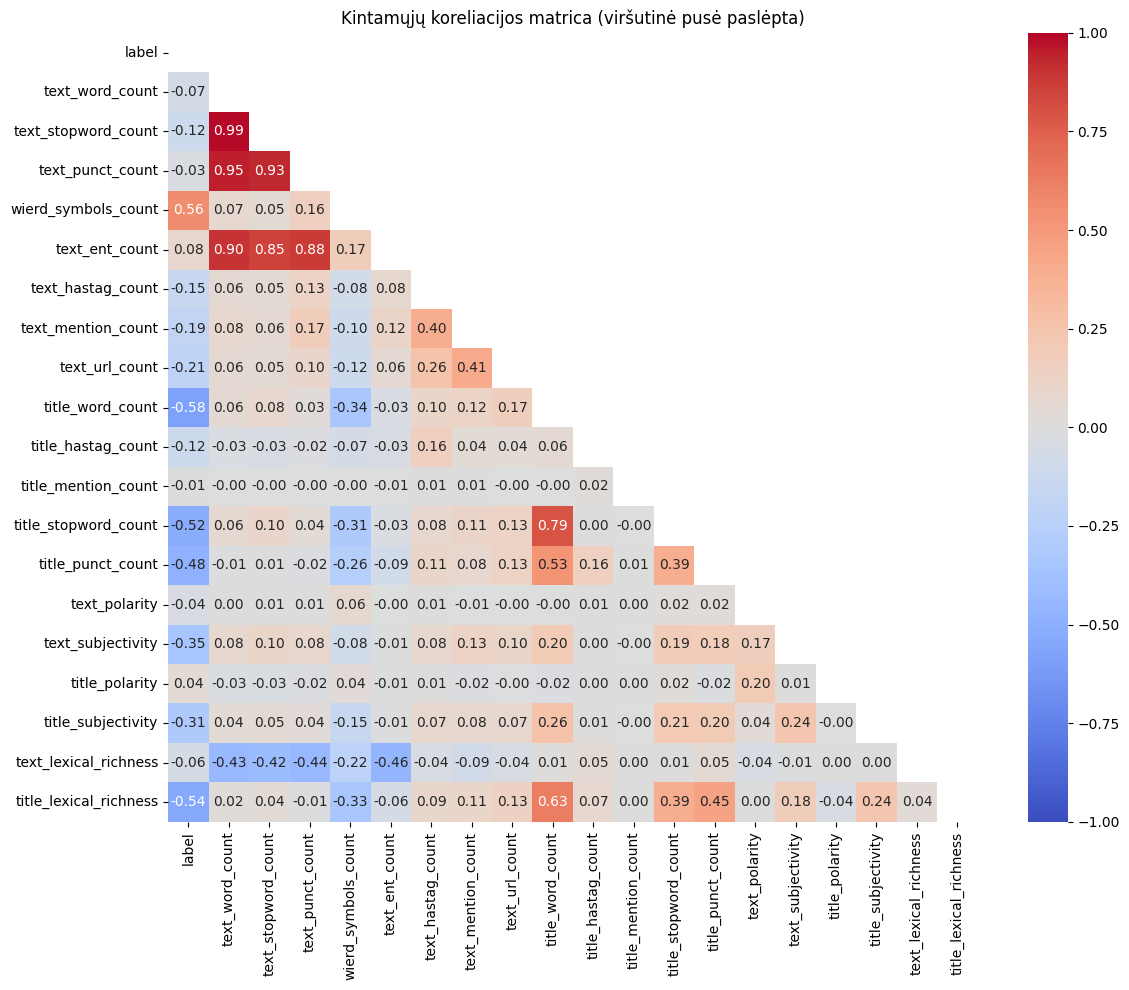

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'title_url_count' column
df = df.drop(columns=['title_url_count'])

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Compute correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask applied
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Kintamųjų koreliacijos matrica (viršutinė pusė paslėpta)")
plt.tight_layout()
plt.show()


## Negerai, kad nebuvo padaryti ratio stulpeliai, o tik count, nes dabar didele koreliacija tarp ilgu tekstu ir stopwords juose, ju lexical richness, punctuation count ir t.t...

In [46]:
numerical_features = df.select_dtypes(include=['number'])

# Compute correlations with the 'label' column
correlation_with_label = numerical_features.corr()['label'].abs().sort_values(ascending=False)

# Print correlations
print("Koreliacija su label (tik skaitiniai požymiai):")
print(correlation_with_label)

Koreliacija su label (tik skaitiniai požymiai):
label                     1.000000
title_word_count          0.583692
wierd_symbols_count       0.560377
title_lexical_richness    0.537406
title_stopword_count      0.516946
title_punct_count         0.484189
text_subjectivity         0.345346
title_subjectivity        0.309411
text_url_count            0.209352
text_mention_count        0.192080
text_hastag_count         0.152742
title_hastag_count        0.123593
text_stopword_count       0.116964
text_ent_count            0.084509
text_word_count           0.072538
text_lexical_richness     0.059798
title_polarity            0.041623
text_polarity             0.036391
text_punct_count          0.028790
title_mention_count       0.008610
Name: label, dtype: float64


## WorldCloud Grafikas

In [47]:
from wordcloud import WordCloud
text = " ".join(df['processed_text2'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

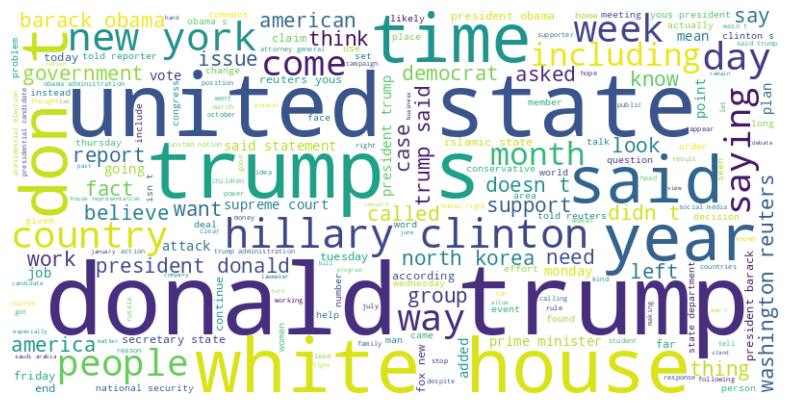

In [48]:
# Bendras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

WorldCloud pagal patikimas naujienas

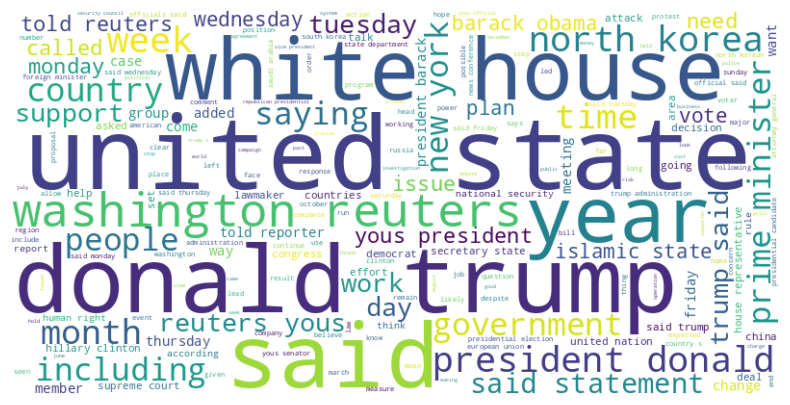

In [49]:
# Real
consolidated = ' '.join(
    word for word in df['processed_text'][df['label'] == 1].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(consolidated)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

WorldCloud pagal melagingas naujienas

(-0.5, 799.5, 399.5, -0.5)

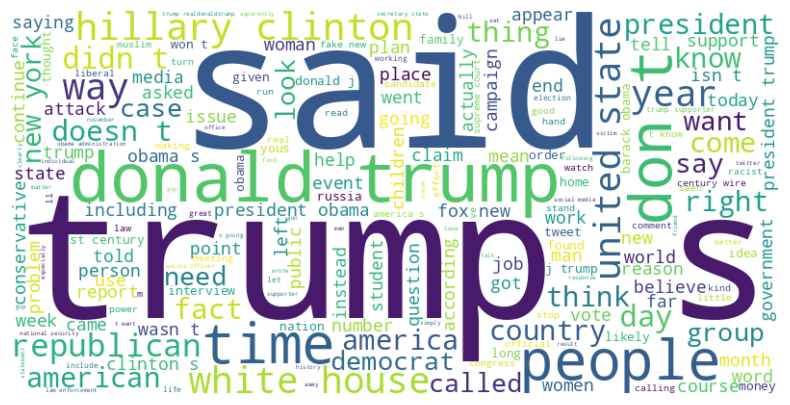

In [50]:
# Fake
consolidated = ' '.join(
    word for word in df['processed_text'][df['label'] == 0].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(consolidated)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## Modelis su visais kiekybiniais features

In [3]:
import pandas as pd
df = pd.read_csv("/content/final_final.csv", index_col=0)

Ismetame ne numerical features, splittiname i 70 % train ir 30% test aibes.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

feature_columns = df.drop(columns=['label', 'title', 'text', 'processed_text', 'people_ents', 'org_ents', 'processed_text2'])
print(feature_columns.columns)

feature_columns

# For features
X_feat = feature_columns.iloc[:, 1:]
y = df['label']

# Train-test split for text
X_feat_train, X_feat_test, y_feat_train, y_feat_test = train_test_split(X_feat, y, test_size=0.3, random_state=42)

### Logistine regresija visiem numerical features



In [5]:
# Logistic Regression for features
logistic_features = LogisticRegression(max_iter=10000)
logistic_features.fit(X_feat_train, y_feat_train)
y_pred_features_log = logistic_features.predict(X_feat_test)
print("Logistic Regression (ALL Features) Accuracy:", accuracy_score(y_feat_test, y_pred_features_log))
print(classification_report(y_feat_test, y_pred_features_log))

Logistic Regression (Features) Accuracy: 0.9257582616568583
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6781
           1       0.92      0.93      0.92      6473

    accuracy                           0.93     13254
   macro avg       0.93      0.93      0.93     13254
weighted avg       0.93      0.93      0.93     13254



### SVM visiem numerical features

In [21]:
# SVM for features
svm_features = SVC(kernel='linear', max_iter=10000)
svm_features.fit(X_feat_train, y_feat_train)
y_pred_features_svm = svm_features.predict(X_feat_test)
print("SVM (ALL Features) Accuracy:", accuracy_score(y_feat_test, y_pred_features_svm))
print(classification_report(y_feat_test, y_pred_features_svm))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM (Features) Accuracy: 0.5761279613701524
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      6781
           1       0.57      0.56      0.56      6473

    accuracy                           0.58     13254
   macro avg       0.58      0.58      0.58     13254
weighted avg       0.58      0.58      0.58     13254



### KNN visiem numerical features

In [7]:
# Normalize features for KNN
scaler = StandardScaler()
X_feat_train_scaled = scaler.fit_transform(X_feat_train)
X_feat_test_scaled = scaler.transform(X_feat_test)

# KNN for features
knn_features = KNeighborsClassifier(n_neighbors=5)
knn_features.fit(X_feat_train_scaled, y_feat_train)
y_pred_features_knn = knn_features.predict(X_feat_test_scaled)
print("KNN (ALL Features) Accuracy:", accuracy_score(y_feat_test, y_pred_features_knn))
print(classification_report(y_feat_test, y_pred_features_knn))

KNN (Features) Accuracy: 0.9183642673909763
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6781
           1       0.91      0.93      0.92      6473

    accuracy                           0.92     13254
   macro avg       0.92      0.92      0.92     13254
weighted avg       0.92      0.92      0.92     13254



## Parinkti features pagal elimination with Cross-Validation

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Define your features and target
X_imp = df.drop(["label", "people_ents", "org_ents", "text", "processed_text", "processed_text2", "title"], axis=1)
y_imp = df["label"]

# Standardize the features
scaler = StandardScaler()
X_imp_scaled = pd.DataFrame(scaler.fit_transform(X_imp), columns=X_imp.columns)

# Split the data into training and testing sets
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp_scaled, y_imp, test_size=0.3, random_state=42)

# Initialize the model for RFE (Logistic Regression)
model = LogisticRegression(max_iter=10000, random_state=42)

# Apply RFECV for feature selection
feature_selector = RFECV(estimator=model, cv=5, scoring='accuracy')
fit = feature_selector.fit(X_imp_train, y_imp_train)



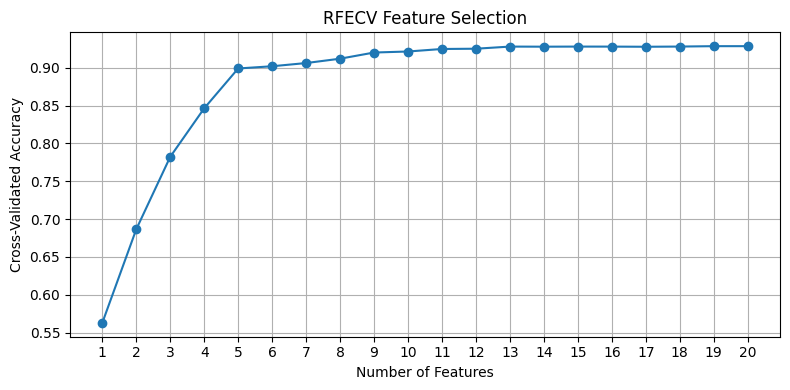

In [56]:
# Get the optimal number of features
optimal_feature_count = feature_selector.n_features_
#print(f"Optimal number of features: {optimal_feature_count}")

# Get the selected features
selected_features = X_imp_train.columns[feature_selector.support_]
#print(f"Selected Features: {list(selected_features)}")

# Plot RFECV results
plt.figure(figsize=(8, 4))
plt.plot(
    range(1, len(feature_selector.cv_results_['mean_test_score']) + 1),
    feature_selector.cv_results_['mean_test_score'],
    marker="o"
)

# Label ticks for each feature count
plt.xticks(
    ticks=range(1, len(feature_selector.cv_results_['mean_test_score']) + 1),
    labels=range(1, len(feature_selector.cv_results_['mean_test_score']) + 1)
)
plt.title(f"RFECV Feature Selection")
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Transform the dataset to retain only selected features
X_train_selected = X_imp_train[selected_features]
X_test_selected = X_imp_test[selected_features]

In [36]:
selected_features_10 = list(selected_features[:10])
print(f"First 10 selected features: {selected_features_10}")

First 10 selected features: ['text_word_count', 'text_stopword_count', 'text_punct_count', 'wierd_symbols_count', 'text_ent_count', 'text_hastag_count', 'text_mention_count', 'text_url_count', 'title_word_count', 'title_hastag_count']


## Naudojant 10 naudingiausiu features ir teksta

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# First 10 selected numerical features
selected_features_10 = ['text_word_count', 'text_stopword_count', 'text_punct_count',
                        'wierd_symbols_count', 'text_ent_count', 'text_hastag_count',
                        'text_mention_count', 'text_url_count', 'title_word_count',
                        'title_hastag_count']

# Define the features and target
X_text_feat = df[selected_features_10]
y_text_feat = df['label']

# Vectorize `processed_text2`
tfidf = TfidfVectorizer(max_features=1000)
processed_text2_tfidf = tfidf.fit_transform(df['processed_text2']).toarray()

# Ensure indices are aligned and reset if needed
X_text_feat = pd.DataFrame(X_text_feat).reset_index(drop=True)
processed_text2_tfidf_df = pd.DataFrame(processed_text2_tfidf).reset_index(drop=True)

# Combine numerical features and vectorized `processed_text2`
X_text_feat_combined = pd.concat([X_text_feat, processed_text2_tfidf_df], axis=1)

# Convert all column names to strings to prevent type issues
X_text_feat_combined.columns = X_text_feat_combined.columns.astype(str)

# Standardize the features
scaler = StandardScaler()
X_text_feat_scaled = scaler.fit_transform(X_text_feat_combined)

# Split the data into training and testing sets
X_train_text_feat, X_test_text_feat, y_train_text_feat, y_test_text_feat = train_test_split(
    X_text_feat_scaled, y_text_feat, test_size=0.3, random_state=42
)

X_train_text_feat shape: (30926, 1010)
X_test_text_feat shape: (13254, 1010)


In [41]:
# Logistic Regression for combined text and selected features
logistic_text_feat = LogisticRegression(max_iter=10000)
logistic_text_feat.fit(X_train_text_feat, y_train_text_feat)
y_pred_text_feat_log = logistic_text_feat.predict(X_test_text_feat)

# Print accuracy and classification report
print("Logistic Regression (Text + Selected Features) Accuracy:", accuracy_score(y_test_text_feat, y_pred_text_feat_log))
print(classification_report(y_test_text_feat, y_pred_text_feat_log))


Logistic Regression (Text + Selected Features) Accuracy: 0.9956994114984156
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6781
           1       1.00      0.99      1.00      6473

    accuracy                           1.00     13254
   macro avg       1.00      1.00      1.00     13254
weighted avg       1.00      1.00      1.00     13254



In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_text_feat = SVC(kernel='linear', max_iter=10000, random_state=42)
svm_text_feat.fit(X_train_text_feat, y_train_text_feat)
y_pred_text_feat_svm = svm_text_feat.predict(X_test_text_feat)

# Print accuracy and classification report
print("SVM (Combined Text and Features) Accuracy:", accuracy_score(y_test_text_feat, y_pred_text_feat_svm))
print(classification_report(y_test_text_feat, y_pred_text_feat_svm))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM (Combined Text and Features) Accuracy: 0.9930586992606005
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6781
           1       0.99      0.99      0.99      6473

    accuracy                           0.99     13254
   macro avg       0.99      0.99      0.99     13254
weighted avg       0.99      0.99      0.99     13254



In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Normalize features for KNN
scaler = StandardScaler()
X_train_text_feat_scaled = scaler.fit_transform(X_train_text_feat)
X_test_text_feat_scaled = scaler.transform(X_test_text_feat)

# KNN for combined features
knn_text_feat = KNeighborsClassifier(n_neighbors=5)
knn_text_feat.fit(X_train_text_feat_scaled, y_train_text_feat)
y_pred_text_feat_knn = knn_text_feat.predict(X_test_text_feat_scaled)

# Print accuracy and classification report
print("KNN (Combined Text and Features) Accuracy:", accuracy_score(y_test_text_feat, y_pred_text_feat_knn))
print(classification_report(y_test_text_feat, y_pred_text_feat_knn))


KNN (Combined Text and Features) Accuracy: 0.6681756450882752
              precision    recall  f1-score   support

           0       0.61      0.98      0.75      6781
           1       0.93      0.35      0.50      6473

    accuracy                           0.67     13254
   macro avg       0.77      0.66      0.63     13254
weighted avg       0.77      0.67      0.63     13254



## Naudojant tik TF-IDF processed text

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X_text = df['processed_text2']
y = df['label']

# Train-test split for text
X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()  # Limit to 1000 most important words
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = vectorizer.transform(X_text_test)

In [15]:
# Logistic Regression for text
logistic_text = LogisticRegression(max_iter=1000)
logistic_text.fit(X_text_train_tfidf, y_train)
y_test_pred_text_log = logistic_text.predict(X_text_test_tfidf)
print("Logistic Regression (Text) Accuracy:", accuracy_score(y_test, y_test_pred_text_log))
print(classification_report(y_test, y_test_pred_text_log))

Logistic Regression (Text) Accuracy: 0.9869473366530859
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6781
           1       0.98      0.99      0.99      6473

    accuracy                           0.99     13254
   macro avg       0.99      0.99      0.99     13254
weighted avg       0.99      0.99      0.99     13254



In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_text = SVC(kernel='linear', random_state=42)
svm_text.fit(X_text_train_tfidf, y_train)
y_test_pred_text_svm = svm_text.predict(X_text_test_tfidf)
print("SVM (Text) Accuracy:", accuracy_score(y_test, y_test_pred_text_svm))
print(classification_report(y_test, y_test_pred_text_svm))

SVM (Text) Accuracy: 0.9947940244454504
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6781
           1       0.99      1.00      0.99      6473

    accuracy                           0.99     13254
   macro avg       0.99      0.99      0.99     13254
weighted avg       0.99      0.99      0.99     13254



In [17]:
# KNN for text (TF-IDF is already scaled)
knn_text = KNeighborsClassifier(n_neighbors=5)
knn_text.fit(X_text_train_tfidf, y_train)
y_test_pred_text_knn = knn_text.predict(X_text_test_tfidf)
print("KNN (Text) Accuracy:", accuracy_score(y_test, y_test_pred_text_knn))
print(classification_report(y_test, y_test_pred_text_knn))


KNN (Text) Accuracy: 0.8719631809265127
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      6781
           1       0.82      0.95      0.88      6473

    accuracy                           0.87     13254
   macro avg       0.88      0.87      0.87     13254
weighted avg       0.88      0.87      0.87     13254



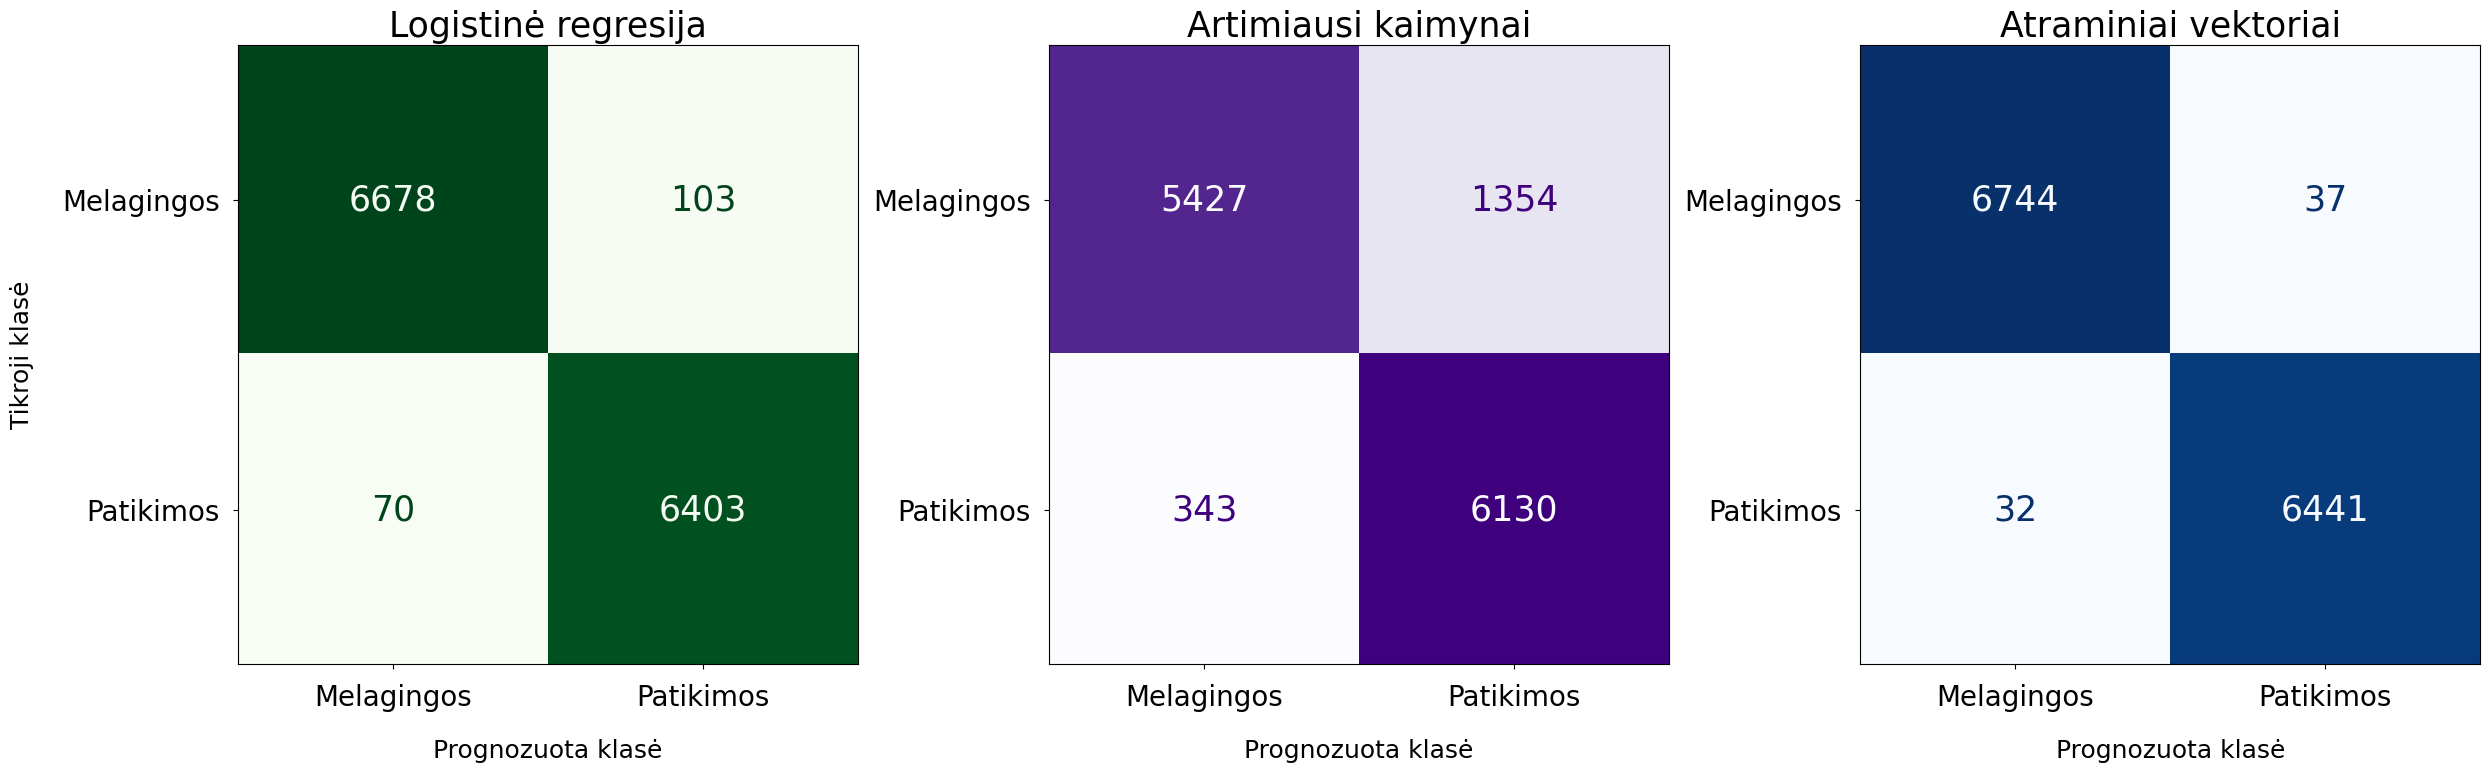

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define display_labels for all confusion matrices
display_labels = ["Melagingos", "Patikimos"]

# Generate confusion matrices
conf_matrix_log = confusion_matrix(y_test, y_test_pred_text_log)
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_text_knn)
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_text_svm)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 8))  # Increased figure size
fig.subplots_adjust(wspace=0.8)  # Adjust horizontal spacing between plots

# Logistic Regression
disp_log = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log, display_labels=display_labels)
disp_log.plot(cmap="Greens", ax=axes[0], values_format='d', colorbar=False)  # Remove colorbar
for text in disp_log.text_.ravel():
    text.set_fontsize(25)  # Font size of matrix values
axes[0].set_title("Logistinė regresija", fontsize=25)
axes[0].set_xlabel("Prognozuota klasė", fontsize=18, labelpad=20)  # Increase label-to-tick spacing
axes[0].set_ylabel("Tikroji klasė", fontsize=18, labelpad=20)
axes[0].tick_params(axis='x', labelsize=20, pad=10)  # Increase tick-to-axis spacing
axes[0].tick_params(axis='y', labelsize=20, pad=10)
axes[0].grid(False)

# KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=display_labels)
disp_knn.plot(cmap="Purples", ax=axes[1], values_format='d', colorbar=False)  # Remove colorbar
for text in disp_knn.text_.ravel():
    text.set_fontsize(25)
axes[1].set_title("Artimiausi kaimynai", fontsize=25)
axes[1].set_xlabel("Prognozuota klasė", fontsize=18, labelpad=20)
axes[1].tick_params(axis='x', labelsize=20, pad=10)
axes[1].tick_params(axis='y', labelsize=20, pad=10)
axes[1].set_ylabel("")  # No ylabel for middle plot
axes[1].grid(False)

# SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=display_labels)
disp_svm.plot(cmap="Blues", ax=axes[2], values_format='d', colorbar=False)  # Remove colorbar
for text in disp_svm.text_.ravel():
    text.set_fontsize(25)
axes[2].set_title("Atraminiai vektoriai", fontsize=25)
axes[2].set_xlabel("Prognozuota klasė", fontsize=18, labelpad=20)
axes[2].tick_params(axis='x', labelsize=20, pad=10)
axes[2].tick_params(axis='y', labelsize=20, pad=10)
axes[2].set_ylabel("")  # No ylabel for rightmost plot
axes[2].grid(False)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust spacing to fit the title
plt.show()


## Naudojant Bag of Words processed text

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Define the text and labels
X_text = df['processed_text2']
y = df['label']

# Train-test split for text
X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)

# Convert text to numerical features using Bag of Words (BoW)
vectorizer = CountVectorizer(max_features=1000)  # Limit to 1000 most frequent words
X_text_train_bow = vectorizer.fit_transform(X_text_train)
X_text_test_bow = vectorizer.transform(X_text_test)

# Logistic Regression
logistic_text = LogisticRegression(max_iter=10000)
logistic_text.fit(X_text_train_bow, y_train)
y_pred_log = logistic_text.predict(X_text_test_bow)
print("Logistic Regression (BoW) Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Support Vector Machine
svm_text = SVC(kernel='linear', max_iter=10000)
svm_text.fit(X_text_train_bow, y_train)
y_pred_svm = svm_text.predict(X_text_test_bow)
print("SVM (BoW) Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# K-Nearest Neighbors
knn_text = KNeighborsClassifier(n_neighbors=5)
knn_text.fit(X_text_train_bow, y_train)
y_pred_knn = knn_text.predict(X_text_test_bow)
print("KNN (BoW) Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Logistic Regression (BoW) Accuracy: 0.9933604949449223
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6781
           1       0.99      0.99      0.99      6473

    accuracy                           0.99     13254
   macro avg       0.99      0.99      0.99     13254
weighted avg       0.99      0.99      0.99     13254



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM (BoW) Accuracy: 0.9897389467330617
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6781
           1       0.99      0.99      0.99      6473

    accuracy                           0.99     13254
   macro avg       0.99      0.99      0.99     13254
weighted avg       0.99      0.99      0.99     13254

KNN (BoW) Accuracy: 0.881696091745888
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6781
           1       0.86      0.90      0.88      6473

    accuracy                           0.88     13254
   macro avg       0.88      0.88      0.88     13254
weighted avg       0.88      0.88      0.88     13254

